# LEGO Sets Dataset Analysis

This notebook analyzes a dataset of LEGO sets including data cleaning, transformation, and visualization steps.

In [28]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

## Step 1: Load and Inspect Data

In [29]:
dataset = 'lego_sets.txt'

In [31]:
df = pd.read_csv(dataset, header=0)  # Loading dataset into a DataFrame

In [32]:
df.head()  # Displaying first few rows

,set_id,name,year,theme,subtheme,themeGroup,category,pieces,minifigs,agerange_min,US_retailPrice,bricksetURL,thumbnailURL,imageURL
0,1-8,Small house set,1970,Minitalia,NaN,Vintage,Normal,67.0,NaN,NaN,NaN,https://brickset.com/sets/1-8,https://images.brickset.com/sets/small/1-8.jpg,https://images.brickset.com/sets/images/1-8.jpg
1,2-8,Medium house set,1970,Minitalia,NaN,Vintage,Normal,109.0,NaN,NaN,NaN,https://brickset.com/sets/2-8,https://images.brickset.com/sets/small/2-8.jpg,https://images.brickset.com/sets/images/2-8.jpg
2,3-6,Medium house set,1970,Minitalia,NaN,Vintage,Normal,158.0,NaN,NaN,NaN,https://brickset.com/sets/3-6,https://images.brickset.com/sets/small/3-6.jpg,https://images.brickset.com/sets/images/3-6.jpg
3,4-4,Large house set,1970,Minitalia,NaN,Vintage,Normal,233.0,NaN,NaN,NaN,https://brickset.com/sets/4-4,https://images.brickset.com/sets/small/4-4.jpg,https://images.brickset.com/sets/images/4-4.jpg
4,4-6,Mini House and Vehicles,1970,Samsonite,Model Maker,Vintage,Normal,NaN,NaN,NaN,NaN,https://brickset.com/sets/4-6,NaN,NaN


In [33]:
df.dtypes  # Checking data types of columns

set_id             object
name               object
year                int64
theme              object
subtheme           object
themeGroup         object
category           object
pieces            float64
minifigs          float64
agerange_min      float64
US_retailPrice    float64
bricksetURL        object
thumbnailURL       object
imageURL           object
dtype: object

In [34]:
df.isna().sum()  # Checking for missing values

set_id                0
name                  0
year                  0
theme                 0
subtheme           3556
themeGroup            2
category              0
pieces             3924
minifigs          10058
agerange_min      11670
US_retailPrice    11475
bricksetURL           0
thumbnailURL       1006
imageURL           1006
dtype: int64

## Step 2: Clean the Dataset
We'll handle missing values and drop irrelevant columns.

In [35]:
df = df.drop(columns=['minifigs', 'agerange_min', 'US_retailPrice', 'thumbnailURL', 'imageURL'])  # Dropping unnecessary columns

In [36]:
df.isna().sum()  # Checking for missing values

set_id            0
name              0
year              0
theme             0
subtheme       3556
themeGroup        2
category          0
pieces         3924
bricksetURL       0
dtype: int64

In [37]:
df.shape

(18457, 9)

In [38]:
mode_subtheme = df.subtheme.mode()[0]
df['subtheme'] = df['subtheme'].fillna(mode_subtheme)  # Filling missing values

In [39]:
mode_themeGroup = df.themeGroup.mode()[0]
df['themeGroup'] = df['themeGroup'].fillna(mode_themeGroup)  # Filling missing values

In [40]:
mean_pieces = df.pieces.mean()

print(mean_pieces)

226.47374939792198


In [41]:
df['pieces'] = df['pieces'].fillna(mean_pieces)  # Filling missing values

In [42]:
df.isna().sum()  # Checking for missing values

set_id         0
name           0
year           0
theme          0
subtheme       0
themeGroup     0
category       0
pieces         0
bricksetURL    0
dtype: int64

## Step 3: Detect and Handle Outliers

In [43]:
sbn.boxplot(df['year'], orient='h')  # Drawing boxplot for outlier detection

<Axes: xlabel='year'>

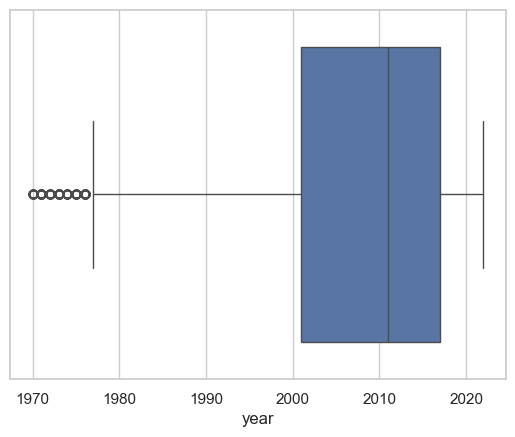

In [44]:
plt.show()

In [45]:
Q1 = df["year"].quantile(0.25)  # Calculating quantiles for IQR
Q3 = df["year"].quantile(0.75)  # Calculating quantiles for IQR
IQR = Q3 - Q1

print(IQR)

16.0


In [46]:
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)

print(Lower_Fence)
print(Upper_Fence)

1977.0
2041.0


In [47]:
df[((df["year"] < Lower_Fence) |(df["year"] > Upper_Fence))]

,set_id,name,year,theme,subtheme,themeGroup,category,pieces,bricksetURL
0,1-8,Small house set,1970,Minitalia,Magazine Gift,Vintage,Normal,67.000000,https://brickset.com/sets/1-8
1,2-8,Medium house set,1970,Minitalia,Magazine Gift,Vintage,Normal,109.000000,https://brickset.com/sets/2-8
2,3-6,Medium house set,1970,Minitalia,Magazine Gift,Vintage,Normal,158.000000,https://brickset.com/sets/3-6
3,4-4,Large house set,1970,Minitalia,Magazine Gift,Vintage,Normal,233.000000,https://brickset.com/sets/4-4
4,4-6,Mini House and Vehicles,1970,Samsonite,Model Maker,Vintage,Normal,226.473749,https://brickset.com/sets/4-6
...,...,...,...,...,...,...,...,...,...
396,1562-3,Biplane,1976,LEGOLAND,Magazine Gift,Vintage,Normal,25.000000,https://brickset.com/sets/1562-3
397,1601-1,Factory,1976,LEGOLAND,Magazine Gift,Vintage,Normal,194.000000,https://brickset.com/sets/1601-1
398,WEETABIX2-1,Windmill,1976,Basic,Magazine Gift,Basic,Other,119.000000,https://brickset.com/sets/WEETABIX2-1
399,WEETABIX3-1,House,1976,Basic,Magazine Gift,Basic,Other,140.000000,https://brickset.com/sets/WEETABIX3-1


In [48]:
df = df[~((df ["year"] < Lower_Fence) |(df["year"] > Upper_Fence))]

In [49]:
sbn.boxplot(df['pieces'], orient='h')  # Drawing boxplot for outlier detection

<Axes: xlabel='pieces'>

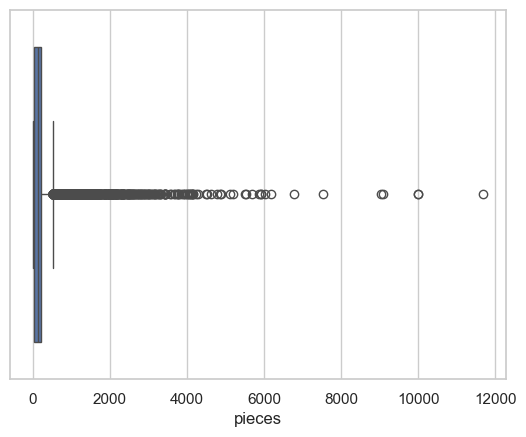

In [50]:
plt.show()

In [51]:
Q1 = df["pieces"].quantile(0.25)  # Calculating quantiles for IQR
Q3 = df["pieces"].quantile(0.75)  # Calculating quantiles for IQR
IQR = Q3 - Q1
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
df = df[~((df ["pieces"] < Lower_Fence) |(df["pieces"] > Upper_Fence))]

## Step 4: Visualize the LEGO Dataset

In [52]:
import matplotlib.pyplot as plt  # Importing libraries
import seaborn as sns  # Importing libraries

# Optional for better styling
sns.set(style="whitegrid")

### Sets Released Per Year

This bar chart visualizes the number of LEGO sets released each year. It highlights the evolution of LEGO's product output over time, showing patterns of growth, peak release periods, and any significant drops (e.g., due to economic factors or strategic shifts). It helps illustrate how LEGO has expanded its offerings across decades.


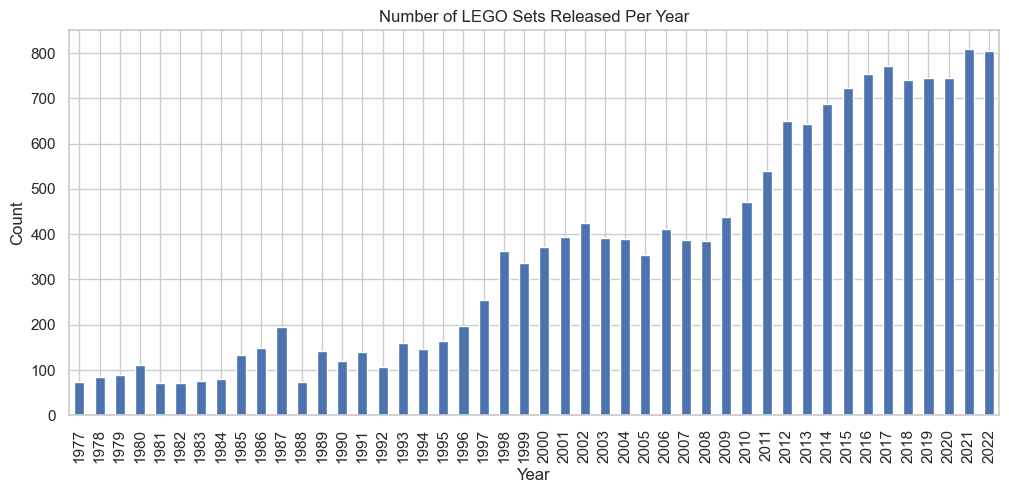

In [53]:
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5))  # Counting occurrences for plotting
plt.title('Number of LEGO Sets Released Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Top 10 Themes by Number of Sets

This bar chart showcases the most prolific LEGO themes based on the number of sets produced. It gives insight into LEGO's most developed or popular product lines, indicating which themes have had the strongest presence in the company's catalog.


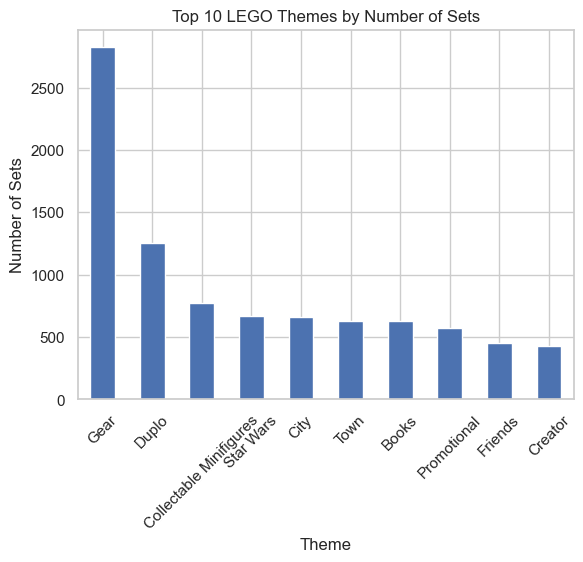

In [54]:
df['theme'].value_counts().head(10).plot(kind='bar')  # Counting occurrences for plotting
plt.title('Top 10 LEGO Themes by Number of Sets')
plt.xlabel('Theme')
plt.ylabel('Number of Sets')
plt.xticks(rotation=45)
plt.show()


### ThemeGroup Distribution (Pie Chart)

This pie chart presents the proportion of LEGO sets across different theme groups. It provides a high-level overview of LEGO’s product focus, revealing which categories (e.g., Licensed, Action/Adventure, Preschool) dominate the portfolio. This helps understand the brand's strategic emphasis on various types of play experiences.


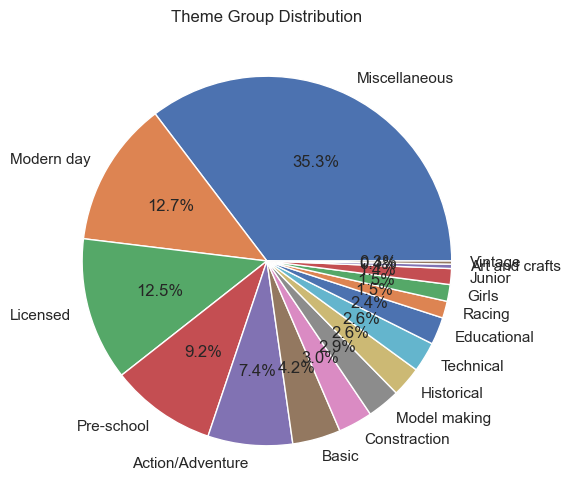

In [55]:
df['themeGroup'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))  # Counting occurrences for plotting
plt.title('Theme Group Distribution')
plt.ylabel('')
plt.show()